In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/CCPP/Folds5x2_pp.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
df.shape

(9568, 5)

In [ ]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
df.mean()

AT      19.651231
V       54.305804
AP    1013.259078
RH      73.308978
PE     454.365009
dtype: float64

In [ ]:
df.std()

AT     7.452473
V     12.707893
AP     5.938784
RH    14.600269
PE    17.066995
dtype: float64

In [ ]:
df = (df - df.mean())/df.std()
df

,AT,V,AP,RH,PE
0,-0.629486,-0.987245,1.820393,-0.009519,0.521181
1,0.741870,0.681010,1.141803,-0.974570,-0.585634
2,-1.951195,-1.172956,-0.185068,1.289772,2.003574
3,0.162197,0.237191,-0.508366,0.228148,-0.462003
4,-1.185007,-1.322470,-0.678435,1.596616,1.144606
...,...,...,...,...,...
9563,-0.402716,-0.363223,0.126444,1.211692,0.331927
9564,-0.866992,-1.190268,1.753039,-0.447182,0.893830
9565,1.565758,1.575729,-0.057096,-2.522486,-1.452805
9566,0.647942,1.191716,0.101186,-0.747861,-1.091288


In [ ]:
df.describe()

,AT,V,AP,RH,PE
count,9.568000e+03,9.568000e+03,9.568000e+03,9.568000e+03,9.568000e+03
mean,-6.851427e-15,-1.758375e-14,-4.731121e-13,7.452041e-15,-5.175128e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.394001e+00,-2.277782e+00,-3.429840e+00,-3.270418e+00,-1.998302e+00
25%,-8.240528e-01,-9.888188e-01,-7.003249e-01,-6.836503e-01,-8.563317e-01
50%,9.309243e-02,-1.751513e-01,-5.372787e-02,1.141090e-01,-1.649388e-01
75%,8.143295e-01,9.627242e-01,6.736938e-01,7.890966e-01,8.241047e-01
max,2.342681e+00,2.144667e+00,3.374584e+00,1.839077e+00,2.425441e+00


In [ ]:
import seaborn as sns

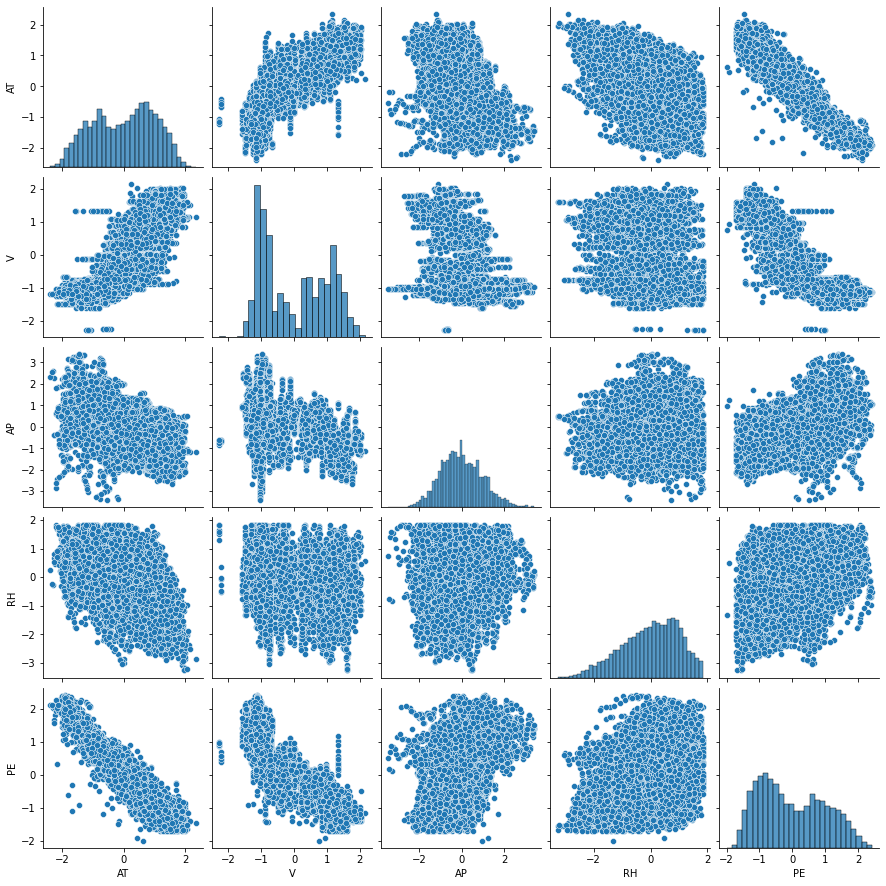

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [ ]:
df = df.drop(['RH'], axis=1)
df.head()

,AT,V,AP,PE
0,-0.629486,-0.987245,1.820393,0.521181
1,0.741870,0.681010,1.141803,-0.585634
2,-1.951195,-1.172956,-0.185068,2.003574
3,0.162197,0.237191,-0.508366,-0.462003
4,-1.185007,-1.322470,-0.678435,1.144606


In [ ]:
def read_data(X,Y):
  X = df[df.columns[:-1]].values
  Y = df[df.columns[-1]].values
  return X, Y

In [ ]:
read_data(X,Y)

(array([[-0.62948649, -0.98724499,  1.82039326],
        [ 0.74187034,  0.68100953,  1.14180313],
        [-1.95119536, -1.17295634, -0.18506789],
        ...,
        [ 1.5657579 ,  1.57572906, -0.05709556],
        [ 0.64794179,  1.19171575,  0.10118601],
        [ 0.2614929 ,  0.64638538,  0.66864227]]),
 array([ 0.52118083, -0.58563382,  2.00357418, ..., -1.45280463,
        -1.09128815, -0.06357355]))

In [ ]:
  # X = df[df.columns[:-1]].values
  # Y = df[df.columns[-1]].values

In [ ]:
# X = read_data(X,Y)[0]
# Y = read_data(X,Y)[1]

In [ ]:
def split_data(X,Y):
  indices = np.arange(len(X))
  np.random.shuffle(indices)
  train_size = int(len(indices)*0.8)
  #train_indices, test_indices = indices[train_size]
  X_train = X[:train_size]
  X_test = X[train_size:]
  Y_train = Y[:train_size]
  Y_test = Y[train_size:]
  return X_train, Y_train, X_test, Y_test

In [ ]:
split_data(X,Y)

(array([[-0.62948649, -0.98724499,  1.82039326],
        [ 0.74187034,  0.68100953,  1.14180313],
        [-1.95119536, -1.17295634, -0.18506789],
        ...,
        [ 0.81969685,  0.23719088, -0.22379636],
        [-1.12462413, -1.07144463,  0.18369449],
        [ 0.94448763,  1.26332479, -1.08424191]]),
 array([ 0.52118083, -0.58563382,  2.00357418, ..., -0.8264495 ,
         1.28347085, -1.13230299]),
 array([[-1.77138928, -1.45860559,  0.94310925],
        [ 0.56474793,  1.62294381,  0.60970764],
        [ 1.00755395, -0.5410656 , -0.68853799],
        ...,
        [ 1.5657579 ,  1.57572906, -0.05709556],
        [ 0.64794179,  1.19171575,  0.10118601],
        [ 0.2614929 ,  0.64638538,  0.66864227]]),
 array([ 1.68483032, -0.58504789, -0.6746946 , ..., -1.45280463,
        -1.09128815, -0.06357355]))

In [ ]:
X_train = split_data(X,Y)[0]
X_train

array([[-0.62948649, -0.98724499,  1.82039326],
       [ 0.74187034,  0.68100953,  1.14180313],
       [-1.95119536, -1.17295634, -0.18506789],
       ...,
       [ 0.81969685,  0.23719088, -0.22379636],
       [-1.12462413, -1.07144463,  0.18369449],
       [ 0.94448763,  1.26332479, -1.08424191]])

In [ ]:
Y_train = split_data(X,Y)[1]
Y_train

array([ 0.52118083, -0.58563382,  2.00357418, ..., -0.8264495 ,
        1.28347085, -1.13230299])

In [ ]:
X_test = split_data(X,Y)[2]
X_test

array([[-1.77138928, -1.45860559,  0.94310925],
       [ 0.56474793,  1.62294381,  0.60970764],
       [ 1.00755395, -0.5410656 , -0.68853799],
       ...,
       [ 1.5657579 ,  1.57572906, -0.05709556],
       [ 0.64794179,  1.19171575,  0.10118601],
       [ 0.2614929 ,  0.64638538,  0.66864227]])

In [ ]:
Y_test = split_data(X,Y)[3]
Y_test

array([ 1.68483032, -0.58504789, -0.6746946 , ..., -1.45280463,
       -1.09128815, -0.06357355])

In [ ]:
#  from sklearn.model_selection import train_test_split
#  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# split_data(X,Y)
import matplotlib.pyplot as plt

### Batch Gradient Descent

In [ ]:
class Linear_Regression():
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
          
    def fit(self, x, y, epochs = 100):
      
        x = (x-x.mean())/x.std()
        N = len(x)
        List = []
        self.w = np.zeros((x.shape[1], 1))
        # print(self.w)
        # print(self.w.shape)
        self.b = 0
        # print(x.shape, y.shape)
        
        for e in range(epochs):
            f = (np.dot(x , self.w) + self.b) - y.reshape((-1, 1))
            # print(f)
    
            self.w -= self.learning_rate * (2/N) * (x.T.dot(f).sum())
            # print(self.w)
            self.b -= self.learning_rate * (2/N) * (f.sum())
            # print(self.b)
            loss = np.sum(np.power((f) ,2))/len(y)
            # print(loss)
        
            # loss = mean_squared_error(y, (self.w * x + self.b))
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss})")
            
            List.append(loss)
                                      
        return List
                
    def predict(self, x):
      x = (x-x.mean())/x.std()
      return np.dot(x , self.w) + self.b
    
    def plot(self):
      plt.plot(List)

Epoch: 0, Loss: 1.0019591067599434)
Epoch: 100, Loss: 0.9384834920619044)
Epoch: 200, Loss: 0.8818122475962116)
Epoch: 300, Loss: 0.8312159644761425)
Epoch: 400, Loss: 0.7860434244842207)
Epoch: 500, Loss: 0.7457132182375359)
Epoch: 600, Loss: 0.7097062618639751)
Epoch: 700, Loss: 0.6775591158713142)
Epoch: 800, Loss: 0.648858020216175)
Epoch: 900, Loss: 0.6232335687980758)
Epoch: 1000, Loss: 0.6003559548338624)
Epoch: 1100, Loss: 0.5799307259156173)
Epoch: 1200, Loss: 0.5616949941153038)
Epoch: 1300, Loss: 0.5454140523563105)
Epoch: 1400, Loss: 0.5308783535011373)
Epoch: 1500, Loss: 0.517900813272996)
Epoch: 1600, Loss: 0.5063144022971665)
Epoch: 1700, Loss: 0.49596999626922017)
Epoch: 1800, Loss: 0.48673445657958453)
Epoch: 1900, Loss: 0.4784889166901226)
Epoch: 2000, Loss: 0.47112725220664753)
Epoch: 2100, Loss: 0.4645547149556451)
Epoch: 2200, Loss: 0.4586867134843805)
Epoch: 2300, Loss: 0.45344772428817987)
Epoch: 2400, Loss: 0.4487703197512777)
Epoch: 2500, Loss: 0.44459430028983

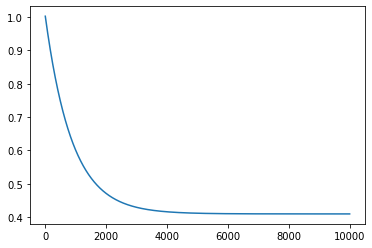

In [ ]:
model = Linear_Regression(learning_rate = 0.0001, epochs=10000)
List = model.fit(X_train, Y_train, 10000)

predictions = model.predict(X_test)
predictions
plot = model.plot()
plot

### Stochastic Gradient Descent

In [ ]:
class Linear_Regression1():
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def _get_batch(self, x, y, batch_size):
        indexes = np.random.randint(len(x), size=batch_size)
        x = x[indexes,:]
        # print(x)
        y = y[indexes]
        # print(y)
        # print(indexes)
        return x, y
    
    def fit(self, x, y, batch_size = 10, epochs = 10000):
        x = (x-x.mean())/x.std()
        N = len(x)
        List = []
        self.w = np.zeros((x.shape[1], 1))
        # print(self.w)
        # print(self.w.shape)
        self.b = 0
        # print(x.shape, y.shape)
        
        for e in range(epochs):
            indexes = np.random.randint(N, size=batch_size)
            X_batch, y_batch = self._get_batch(x, y, batch_size)
            
            f = (np.dot(X_batch , self.w) + self.b) - y_batch.reshape((-1, 1))

            # f = y_batch - (self.w * X_batch + self.b)
    
            self.w -= self.learning_rate * (2/N) * (X_batch.T.dot(f).sum())
            self.b -= self.learning_rate * (2/N) * (f.sum())
                                
            loss1 = np.sum(np.power((f) ,2))/len(y_batch)
            
        
            # loss = mean_squared_error(y_batch, (self.w * X_batch + self.b))
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss1})")
            
            List.append(loss1)
                                      
        return List
                
    def predict(self, x):
        x = (x-x.mean())/x.std()
        return np.dot(x, self.w) + self.b

    def plot(self):
      plt.plot(List)

Epoch: 0, Loss: 0.9863990593579709)
Epoch: 100, Loss: 0.9082847426577993)
Epoch: 200, Loss: 0.8443234907770404)
Epoch: 300, Loss: 0.8023260672349541)
Epoch: 400, Loss: 0.7277664123572414)
Epoch: 500, Loss: 0.6950728589591758)
Epoch: 600, Loss: 0.6472848590025091)
Epoch: 700, Loss: 0.6250899697540648)
Epoch: 800, Loss: 0.5922892890283169)
Epoch: 900, Loss: 0.5688982572639687)
Epoch: 1000, Loss: 0.5361600114804731)
Epoch: 1100, Loss: 0.523838311725084)
Epoch: 1200, Loss: 0.5193960686720704)
Epoch: 1300, Loss: 0.4885713266835265)
Epoch: 1400, Loss: 0.4721029252216344)
Epoch: 1500, Loss: 0.48094699602060537)
Epoch: 1600, Loss: 0.45849922647277397)
Epoch: 1700, Loss: 0.46684887704593775)
Epoch: 1800, Loss: 0.45769736906847464)
Epoch: 1900, Loss: 0.45104557326879696)
Epoch: 2000, Loss: 0.44032491829458414)
Epoch: 2100, Loss: 0.44000872518064227)
Epoch: 2200, Loss: 0.4275650790357864)
Epoch: 2300, Loss: 0.4298626906321332)
Epoch: 2400, Loss: 0.4206237417701705)
Epoch: 2500, Loss: 0.4260490438

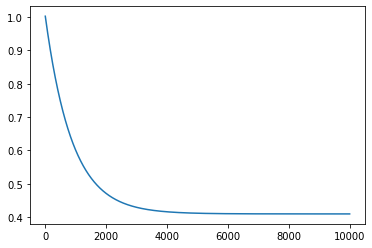

In [ ]:
model1 = Linear_Regression1(learning_rate = 0.0001, epochs=10000)
List1 = model1.fit(X_train, Y_train, 10000)

predictions1 = model1.predict(X_test)
predictions1
plot1 = model1.plot()
plot1

### Mini Batch Gradient Descent

In [ ]:
class Linear_Regression2():
    def __init__(self, x, y, learning_rate, batch):
        self.learning_rate = learning_rate
        self.batch = batch
        self.x = x
        self.y = y
        # self.number_ite = number_ite
        # self.w = 0
        # self.b = 0
    
    def _get_batch(self, x, y, batch_size):
        for i in range(0, len(x), self.batch):
          x = self.x[i:i+self.batch]
          y = self.y[i:i+self.batch]
        return x, y
    
    def fit(self, x, y, batch_size = 2, epochs = 10000):
        x = (x-x.mean())/x.std()
        N = len(x)
        List = []
        self.w = np.zeros((x.shape[1], 1))
        # print(self.w)
        # print(self.w.shape)
        self.b = 0
        # print(x.shape, y.shape)
        
        for e in range(epochs):
            # indexes = np.random.randint(N, size=batch_size)
            X_batch, y_batch = self._get_batch(x, y, batch_size)
            
            f = (np.dot(X_batch , self.w) + self.b) - y_batch.reshape((-1, 1))

            # f = y_batch - (self.w * X_batch + self.b)
    
            self.w -= self.learning_rate * (2/N) * (X_batch.T.dot(f).sum())
            self.b -= self.learning_rate * (2/N) * (f.sum())
                                
            loss1 = np.sum(np.power((f) ,2))/len(y_batch)
            
        
            # loss = mean_squared_error(y_batch, (self.w * X_batch + self.b))
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss1})")
            
            List.append(loss1)
                                      
        return List
                
    def predict(self, x):
        x = (x-x.mean())/x.std()
        return np.dot(x, self.w) + self.b

    def plot(self):
      plt.plot(List)

Epoch: 0, Loss: 1.2821100529047504)
Epoch: 100, Loss: 1.2820948940730121)
Epoch: 200, Loss: 1.2820797354205022)
Epoch: 300, Loss: 1.2820645769472179)
Epoch: 400, Loss: 1.2820494186531577)
Epoch: 500, Loss: 1.282034260538319)
Epoch: 600, Loss: 1.2820191026027004)
Epoch: 700, Loss: 1.282003944846299)
Epoch: 800, Loss: 1.2819887872691134)
Epoch: 900, Loss: 1.2819736298711408)
Epoch: 1000, Loss: 1.2819584726523794)
Epoch: 1100, Loss: 1.281943315612827)
Epoch: 1200, Loss: 1.2819281587524813)
Epoch: 1300, Loss: 1.281913002071341)
Epoch: 1400, Loss: 1.281897845569403)
Epoch: 1500, Loss: 1.281882689246666)
Epoch: 1600, Loss: 1.2818675331031268)
Epoch: 1700, Loss: 1.2818523771387842)
Epoch: 1800, Loss: 1.281837221353636)
Epoch: 1900, Loss: 1.28182206574768)
Epoch: 2000, Loss: 1.2818069103209135)
Epoch: 2100, Loss: 1.281791755073335)
Epoch: 2200, Loss: 1.2817766000049426)
Epoch: 2300, Loss: 1.2817614451157335)
Epoch: 2400, Loss: 1.2817462904057062)
Epoch: 2500, Loss: 1.2817311358748582)
Epoch: 2

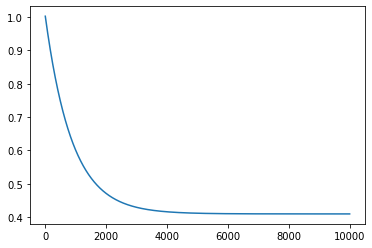

In [ ]:
model2 = Linear_Regression2(X_train, Y_train, learning_rate = 0.0001, batch = 1)
List2 = model2.fit(X_train, Y_train, 10000)

predictions2 = model2.predict(X_test)
predictions2
plot2 = model2.plot()
plot2

### Batch Gradient Descent with L_1 Regularization

In [ ]:
class Linear_Regression():
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
          
    def fit(self, x, y, epochs = 100):
      
        x = (x-x.mean())/x.std()
        N = len(x)
        List = []
        self.w = np.zeros((x.shape[1], 1))
        # print(self.w)
        # print(self.w.shape)
        self.b = 0
        for j in range(-10,10):
          self.alpha = j
        # print(x.shape, y.shape)
        
        for e in range(epochs):
            f = (np.dot(x , self.w) + self.b +  self.alpha * np.linalg.norm(self.w)) - y.reshape((-1, 1))
            # print(f)
    
            self.w -= self.learning_rate * (2/N) * (x.T.dot(f).sum() + self.alpha * np.sign(self.w).sum())
            # print(self.w)
            self.b -= self.learning_rate * (2/N) * f.sum()
            # print(self.b)
            loss = np.sum(np.power((f) ,2))/len(y)
            # print(loss)
        
            # loss = mean_squared_error(y, (self.w * x + self.b))
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss})")
            
            List.append(loss)
                                      
        return List
                
    def predict(self, x):
      x = (x-x.mean())/x.std()
      return np.dot(x , self.w) + self.b
    
    def plot(self):
      plt.plot(List)

Epoch: 0, Loss: 1.0019591067599434)
Epoch: 100, Loss: 1.0856852421818175)
Epoch: 200, Loss: 1.4330981613194198)
Epoch: 300, Loss: 1.9846807960376367)
Epoch: 400, Loss: 2.690040962020942)
Epoch: 500, Loss: 3.5067118568883764)
Epoch: 600, Loss: 4.399099745914588)
Epoch: 700, Loss: 5.337560065049438)
Epoch: 800, Loss: 6.297586997350997)
Epoch: 900, Loss: 7.259103268845969)
Epoch: 1000, Loss: 8.205838412045017)
Epoch: 1100, Loss: 9.124785080472565)
Epoch: 1200, Loss: 10.005724183979074)
Epoch: 1300, Loss: 10.840810668646668)
Epoch: 1400, Loss: 11.62421270135007)
Epoch: 1500, Loss: 12.351797850476105)
Epoch: 1600, Loss: 13.020860592501798)
Epoch: 1700, Loss: 13.629886129384673)
Epoch: 1800, Loss: 14.17834608320122)
Epoch: 1900, Loss: 14.666522150352527)
Epoch: 2000, Loss: 15.095354255212383)
Epoch: 2100, Loss: 15.466310148800753)
Epoch: 2200, Loss: 15.781273757689222)
Epoch: 2300, Loss: 16.042449907018252)
Epoch: 2400, Loss: 16.2522833237953)
Epoch: 2500, Loss: 16.413390076615652)
Epoch: 26

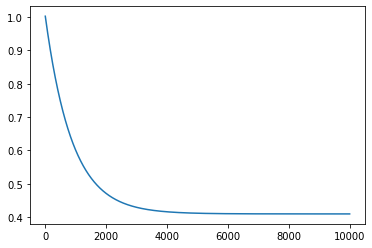

In [ ]:
model3 = Linear_Regression(learning_rate = 0.0001, epochs = 10000)
List3 = model3.fit(X_train, Y_train, 10000)

predictions3 = model3.predict(X_test)
predictions3
plot = model3.plot()
plot

### Batch Gradient Descent with L_2 Regularization

In [ ]:
class Linear_Regression():
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
          
    def fit(self, x, y, epochs = 100):
      
        x = (x-x.mean())/x.std()
        N = len(x)
        List = []
        self.w = np.zeros((x.shape[1], 1))
        # print(self.w)
        # print(self.w.shape)
        self.b = 0
        for j in range(-10,10):
          self.alpha = j
        # print(x.shape, y.shape)
        
        for e in range(epochs):
            f = (np.dot(x , self.w) + self.b +  self.alpha * self.w.T.dot(self.w) ) - y.reshape((-1, 1))
            # print(f)
    
            self.w -= self.learning_rate * (2/N) * (x.T.dot(f).sum() + self.alpha * self.w.sum())
            # print(self.w)
            self.b -= self.learning_rate * (2/N) * f.sum()
            # print(self.b)
            loss = np.sum(np.power((f) ,2))/len(y)
            # print(loss)
        
            # loss = mean_squared_error(y, (self.w * x + self.b))
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss})")
            
            List.append(loss)
                                      
        return List
                
    def predict(self, x):
      x = (x-x.mean())/x.std()
      return np.dot(x , self.w) + self.b
    
    def plot(self):
      plt.plot(List)

Epoch: 0, Loss: 1.0019591067599434)
Epoch: 100, Loss: 0.9386284341728954)
Epoch: 200, Loss: 0.8853677732833554)
Epoch: 300, Loss: 0.8483781396364836)
Epoch: 400, Loss: 0.8352193705558771)
Epoch: 500, Loss: 0.8531153942473774)
Epoch: 600, Loss: 0.907990474616494)
Epoch: 700, Loss: 1.0040046372072804)
Epoch: 800, Loss: 1.1434195203804884)
Epoch: 900, Loss: 1.3266732743643388)
Epoch: 1000, Loss: 1.5525785201155424)
Epoch: 1100, Loss: 1.8185836235133803)
Epoch: 1200, Loss: 2.1210568357760975)
Epoch: 1300, Loss: 2.455566892104523)
Epoch: 1400, Loss: 2.8171437495589466)
Epoch: 1500, Loss: 3.200510279845626)
Epoch: 1600, Loss: 3.600280674887626)
Epoch: 1700, Loss: 4.011124652164345)
Epoch: 1800, Loss: 4.427898701423608)
Epoch: 1900, Loss: 4.845746924774683)
Epoch: 2000, Loss: 5.260174735551216)
Epoch: 2100, Loss: 5.667098981366352)
Epoch: 2200, Loss: 6.062878078793756)
Epoch: 2300, Loss: 6.44432558976643)
Epoch: 2400, Loss: 6.808710404123196)
Epoch: 2500, Loss: 7.153746369062385)
Epoch: 2600,

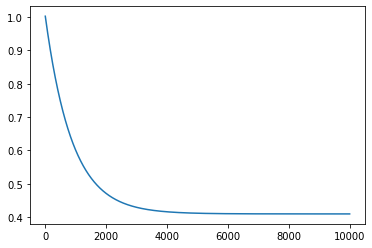

In [ ]:
model4 = Linear_Regression(learning_rate = 0.0001, epochs = 10000)
List4 = model4.fit(X_train, Y_train, 10000)

predictions4 = model4.predict(X_test)
predictions4
plot = model4.plot()
plot

### Batch Gradient Descent with L_1 and L_2 Regularization

In [ ]:
class Linear_Regression():
    def __init__(self, learning_rate, epochs, l1_ratio):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.l1_ratio = l1_ratio
          
    def fit(self, x, y, epochs = 100):
      
        x = (x-x.mean())/x.std()
        N = len(x)
        List = []
        self.w = np.zeros((x.shape[1], 1))
        # print(self.w)
        # print(self.w.shape)
        self.b = 0
        for j in range(-10,10):
          self.alpha = j
        # print(x.shape, y.shape)
        
        for e in range(epochs):
            self.l1_contr = self.l1_ratio * np.linalg.norm(self.w)
            self.l2_contr = (1 - self.l1_ratio) * 0.5 * self.w.T.dot(self.w)
            f = (np.dot(x , self.w) + self.b +  self.alpha * (self.l1_contr + self.l2_contr)) - y.reshape((-1, 1))
            # print(f)

            self.l1_contr = self.l1_ratio * np.sign(self.w)
            self.l2_contr = (1 - self.l1_ratio) * self.w
    
            self.w -= self.learning_rate * (2/N) * (x.T.dot(f).sum() + self.alpha * (self.l1_contr + self.l2_contr).sum())
            # print(self.w)
            self.b -= self.learning_rate * (2/N) * f.sum()
            # print(self.b)
            loss = np.sum(np.power((f) ,2))/len(y)
            # print(loss)
        
            # loss = mean_squared_error(y, (self.w * x + self.b))
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss})")
            
            List.append(loss)
                                      
        return List
                
    def predict(self, x):
      x = (x-x.mean())/x.std()
      return np.dot(x , self.w) + self.b
    
    def plot(self):
      plt.plot(List)

Epoch: 0, Loss: 1.0019591067599434)
Epoch: 100, Loss: 0.9762172172769878)
Epoch: 200, Loss: 1.030537449614089)
Epoch: 300, Loss: 1.1554477943140011)
Epoch: 400, Loss: 1.3413287978562685)
Epoch: 500, Loss: 1.5786783492498804)
Epoch: 600, Loss: 1.858316179599611)
Epoch: 700, Loss: 2.171535746181689)
Epoch: 800, Loss: 2.5102116467708693)
Epoch: 900, Loss: 2.866870051838222)
Epoch: 1000, Loss: 3.2347288854229834)
Epoch: 1100, Loss: 3.6077136956907094)
Epoch: 1200, Loss: 3.98045437754201)
Epoch: 1300, Loss: 4.348267170456688)
Epoch: 1400, Loss: 4.7071256719710055)
Epoch: 1500, Loss: 5.053623989614735)
Epoch: 1600, Loss: 5.384934604965635)
Epoch: 1700, Loss: 5.698763042088692)
Epoch: 1800, Loss: 5.993301015917748)
Epoch: 1900, Loss: 6.267179379512119)
Epoch: 2000, Loss: 6.519421887170298)
Epoch: 2100, Loss: 6.749400537378412)
Epoch: 2200, Loss: 6.956793049787471)
Epoch: 2300, Loss: 7.141542858350871)
Epoch: 2400, Loss: 7.303821863271014)
Epoch: 2500, Loss: 7.443996072793625)
Epoch: 2600, Los

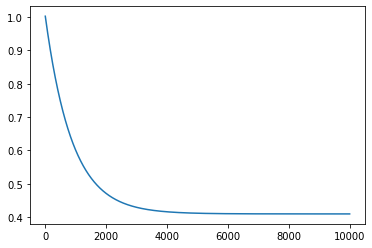

In [ ]:
model5 = Linear_Regression(learning_rate = 0.0001, epochs = 10000, l1_ratio =0.5)
List5 = model5.fit(X_train, Y_train, 10000)

predictions5 = model5.predict(X_test)
predictions5
plot = model5.plot()
plot

### stochastic Gradient Descent with L_1 Regularization

In [ ]:
class Linear_Regression1():
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
        # self.w = 0
        # self.b = 0
    
    def _get_batch(self, x, y, batch_size):
        indexes = np.random.randint(len(x), size=batch_size)
        x = x[indexes,:]
        # print(x)
        y = y[indexes]
        # print(y)
        # print(indexes)
        return x, y
    
    def fit(self, x, y, batch_size = 3, epochs = 10000):
        x = (x-x.mean())/x.std()
        N = len(x)
        List = []
        self.w = np.zeros((x.shape[1], 1))
        # print(self.w)
        # print(self.w.shape)
        self.b = 0
        for j in range(-10,10):
          self.alpha = j
        # print(x.shape, y.shape)
        
        for e in range(epochs):
            indexes = np.random.randint(N, size=batch_size)
            X_batch, y_batch = self._get_batch(x, y, batch_size)
            
            f = (np.dot(X_batch , self.w) + self.b + self.alpha * np.linalg.norm(self.w)) - y_batch.reshape((-1, 1))

            # f = y_batch - (self.w * X_batch + self.b)
    
            self.w -= self.learning_rate * (2/N) * (X_batch.T.dot(f).sum() + self.alpha * np.sign(self.w).sum())
            self.b -= self.learning_rate * (2/N) * f.sum()
                                
            loss1 = np.sum(np.power((f) ,2))/len(y_batch)
            
        
            # loss = mean_squared_error(y_batch, (self.w * X_batch + self.b))
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss1})")
            
            List.append(loss1)
                                      
        return List
                
    def predict(self, x):
        x = (x-x.mean())/x.std()
        return np.dot(x, self.w) + self.b
        
    def plot(self):
      plt.plot(List)

Epoch: 0, Loss: 0.9974987879265648)
Epoch: 100, Loss: 0.9772624519171345)
Epoch: 200, Loss: 0.42125838218208683)
Epoch: 300, Loss: 0.41715932635714137)
Epoch: 400, Loss: 0.4002755379522282)
Epoch: 500, Loss: 0.4168697410329922)
Epoch: 600, Loss: 0.40830918610804257)
Epoch: 700, Loss: 0.41222414058775564)
Epoch: 800, Loss: 0.4071900079939269)
Epoch: 900, Loss: 0.4134550576631708)
Epoch: 1000, Loss: 0.40728656395259893)
Epoch: 1100, Loss: 0.40669924174354094)
Epoch: 1200, Loss: 0.41437761422249025)
Epoch: 1300, Loss: 0.40498076141185885)
Epoch: 1400, Loss: 0.4101546571200969)
Epoch: 1500, Loss: 0.41475439237993766)
Epoch: 1600, Loss: 0.39964351326249364)
Epoch: 1700, Loss: 0.4055811739365073)
Epoch: 1800, Loss: 0.40760431568614597)
Epoch: 1900, Loss: 0.4083014592228441)
Epoch: 2000, Loss: 0.40852131422639043)
Epoch: 2100, Loss: 0.4125438868827346)
Epoch: 2200, Loss: 0.40739893610040556)
Epoch: 2300, Loss: 0.40949566612110366)
Epoch: 2400, Loss: 0.40399968962036176)
Epoch: 2500, Loss: 0.4

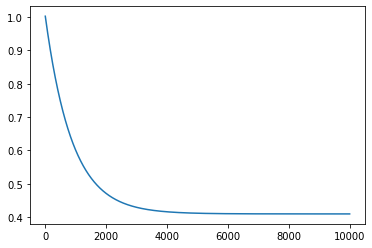

In [ ]:
model6 = Linear_Regression1(learning_rate = 0.01, epochs=10000)
List6 = model6.fit(X_train, Y_train, 10000)

predictions6 = model6.predict(X_test)
predictions6
plot6 = model6.plot()
plot6

### stochastic Gradient Descent with L_2 Regularization

In [ ]:
class Linear_Regression1():
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def _get_batch(self, x, y, batch_size):
        indexes = np.random.randint(len(x), size=batch_size)
        x = x[indexes,:]
        # print(x)
        y = y[indexes]
        # print(y)
        # print(indexes)
        return x, y
    
    def fit(self, x, y, batch_size = 2, epochs = 10000):
        x = (x-x.mean())/x.std()
        N = len(x)
        List = []
        self.w = np.zeros((x.shape[1], 1))
        # print(self.w)
        # print(self.w.shape)
        self.b = 0
        # print(x.shape, y.shape)
        for j in range(-10,10):
          self.alpha = j
        # print(x.shape, y.shape)


        for e in range(epochs):
            indexes = np.random.randint(N, size=batch_size)
            X_batch, y_batch = self._get_batch(x, y, batch_size)
            
            f = (np.dot(X_batch , self.w) + self.b + self.alpha * self.w.T.dot(self.w)) - y_batch.reshape((-1, 1))

            # f = y_batch - (self.w * X_batch + self.b)
    
            self.w -= self.learning_rate * (2/N) * (X_batch.T.dot(f).sum() + self.alpha * self.w.sum())
            self.b -= self.learning_rate * (2/N) * (f.sum())
                                
            loss1 = np.sum(np.power((f) ,2))/len(y_batch)
            
        
            # loss = mean_squared_error(y_batch, (self.w * X_batch + self.b))
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss1})")
            
            List.append(loss1)
                                      
        return List
                
    def predict(self, x):
        x = (x-x.mean())/x.std()
        return np.dot(x, self.w) + self.b

    def plot(self):
      plt.plot(List)

Epoch: 0, Loss: 0.9856978010268195)
Epoch: 100, Loss: 0.932200760364408)
Epoch: 200, Loss: 0.4182032670450516)
Epoch: 300, Loss: 0.4043866043552242)
Epoch: 400, Loss: 0.405493745894359)
Epoch: 500, Loss: 0.4050756165926306)
Epoch: 600, Loss: 0.4145584449326274)
Epoch: 700, Loss: 0.4033896505776334)
Epoch: 800, Loss: 0.40798016797870207)
Epoch: 900, Loss: 0.4199384462366118)
Epoch: 1000, Loss: 0.4157991531559872)
Epoch: 1100, Loss: 0.405494249750796)
Epoch: 1200, Loss: 0.40595774264118306)
Epoch: 1300, Loss: 0.41745883807589246)
Epoch: 1400, Loss: 0.4074479562952236)
Epoch: 1500, Loss: 0.4169895556594412)
Epoch: 1600, Loss: 0.40655194261049926)
Epoch: 1700, Loss: 0.4094818094477031)
Epoch: 1800, Loss: 0.4125791066691955)
Epoch: 1900, Loss: 0.40463912837167343)
Epoch: 2000, Loss: 0.40230360962781786)
Epoch: 2100, Loss: 0.4212092117346325)
Epoch: 2200, Loss: 0.4166713828716351)
Epoch: 2300, Loss: 0.4107459112611242)
Epoch: 2400, Loss: 0.40902721388572055)
Epoch: 2500, Loss: 0.409492105865

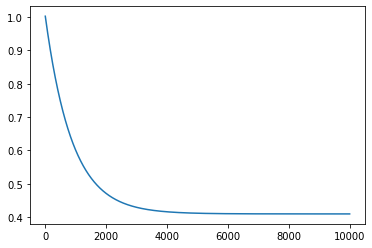

In [ ]:
model7 = Linear_Regression1(learning_rate = 0.01, epochs=10000)
List7 = model7.fit(X_train, Y_train, 10000)

predictions7 = model7.predict(X_test)
predictions7
plot7 = model7.plot()
plot7

### stochastic Gradient Descent with L_1 and L_2 Regularization

In [ ]:
class Linear_Regression1():
    def __init__(self, learning_rate, epochs, l1_ratio):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.l1_ratio = l1_ratio
    
    def _get_batch(self, x, y, batch_size):
        indexes = np.random.randint(len(x), size=batch_size)
        x = x[indexes,:]
        # print(x)
        y = y[indexes]
        # print(y)
        # print(indexes)
        return x, y
    
    def fit(self, x, y, batch_size = 2, epochs = 10000):
        x = (x-x.mean())/x.std()
        N = len(x)
        List = []
        self.w = np.zeros((x.shape[1], 1))
        # print(self.w)
        # print(self.w.shape)
        self.b = 0
        # print(x.shape, y.shape)
        for j in range(-10,10):
          self.alpha = j
        # print(x.shape, y.shape)
        
        for e in range(epochs):
            indexes = np.random.randint(N, size=batch_size)
            X_batch, y_batch = self._get_batch(x, y, batch_size)

            self.l1_contr = self.l1_ratio * np.linalg.norm(self.w)
            self.l2_contr = (1 - self.l1_ratio) * 0.5 * self.w.T.dot(self.w)
            
            f = (np.dot(X_batch , self.w) + self.b +  self.alpha * (self.l1_contr + self.l2_contr)) - y_batch.reshape((-1, 1))

            self.l1_contr = self.l1_ratio * np.sign(self.w)
            self.l2_contr = (1 - self.l1_ratio) * self.w
    

            # f = y_batch - (self.w * X_batch + self.b)
    
            self.w -= self.learning_rate * (2/N) * (X_batch.T.dot(f).sum() + self.alpha * (self.l1_contr + self.l2_contr).sum())
            self.b -= self.learning_rate * (2/N) * (f.sum())
                                
            loss1 = np.sum(np.power((f) ,2))/len(y_batch)
            
        
            # loss = mean_squared_error(y_batch, (self.w * X_batch + self.b))
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss1})")
            
            List.append(loss1)
                                      
        return List
                
    def predict(self, x):
        x = (x-x.mean())/x.std()
        return np.dot(x, self.w) + self.b

    def plot(self):
      plt.plot(List)

Epoch: 0, Loss: 1.0159237712204854)
Epoch: 100, Loss: 0.7396813110558849)
Epoch: 200, Loss: 0.41518975204405517)
Epoch: 300, Loss: 0.4121798843102473)
Epoch: 400, Loss: 0.41301138845851565)
Epoch: 500, Loss: 0.4022061545515925)
Epoch: 600, Loss: 0.41102173140051707)
Epoch: 700, Loss: 0.4219072028874244)
Epoch: 800, Loss: 0.4131210543364992)
Epoch: 900, Loss: 0.4166501020327694)
Epoch: 1000, Loss: 0.41714122822214267)
Epoch: 1100, Loss: 0.41208181792775567)
Epoch: 1200, Loss: 0.4076120134382801)
Epoch: 1300, Loss: 0.4054626270193632)
Epoch: 1400, Loss: 0.39988024080739254)
Epoch: 1500, Loss: 0.4017855005282441)
Epoch: 1600, Loss: 0.412066688355886)
Epoch: 1700, Loss: 0.4108519371505913)
Epoch: 1800, Loss: 0.4079469720604542)
Epoch: 1900, Loss: 0.40426316161550885)
Epoch: 2000, Loss: 0.4093267549161033)
Epoch: 2100, Loss: 0.4141584428152316)
Epoch: 2200, Loss: 0.40240731573061067)
Epoch: 2300, Loss: 0.3990460503122188)
Epoch: 2400, Loss: 0.4145547681443576)
Epoch: 2500, Loss: 0.409908845

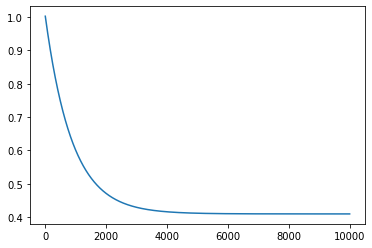

In [ ]:
model8 = Linear_Regression1(learning_rate = 0.01, epochs=10000, l1_ratio=0.5)
List8 = model8.fit(X_train, Y_train, 10000)

predictions8 = model8.predict(X_test)
predictions8
plot8 = model8.plot()
plot8

### Mini Batch Gradient Descent with L_1 Regularization

In [ ]:
class Linear_Regression2():
    def __init__(self, x, y, learning_rate, batch):
        self.learning_rate = learning_rate
        self.batch = batch
        self.x = x
        self.y = y
        # self.number_ite = number_ite
        # self.w = 0
        # self.b = 0
    
    def _get_batch(self, x, y, batch_size):
        for i in range(0, len(x), self.batch):
          x = self.x[i:i+self.batch]
          y = self.y[i:i+self.batch]
        return x, y
    
    def fit(self, x, y, batch_size = 3, epochs = 10000):
        x = (x-x.mean())/x.std()
        N = len(x)
        List = []
        self.w = np.zeros((x.shape[1], 1))
        # print(self.w)
        # print(self.w.shape)
        self.b = 0
        # print(x.shape, y.shape)

        for j in range(-10,10):
          self.alpha = j
        # print(x.shape, y.shape)
        
        
        for e in range(epochs):
            # indexes = np.random.randint(N, size=batch_size)
            X_batch, y_batch = self._get_batch(x, y, batch_size)
            
            f = (np.dot(X_batch , self.w) + self.b + self.alpha * np.linalg.norm(self.w)) - y_batch.reshape((-1, 1))

            # f = y_batch - (self.w * X_batch + self.b)
    
            self.w -= self.learning_rate * (2/N) * (X_batch.T.dot(f).sum() + + self.alpha * np.sign(self.w).sum())
            self.b -= self.learning_rate * (2/N) * (f.sum())
                                
            loss1 = np.sum(np.power((f) ,2))/len(y_batch)
            
        
            # loss = mean_squared_error(y_batch, (self.w * X_batch + self.b))
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss1})")
            
            List.append(loss1)
                                      
        return List
                
    def predict(self, x):
        x = (x-x.mean())/x.std()
        return np.dot(x, self.w) + self.b

    def plot(self):
      plt.plot(List)

Epoch: 0, Loss: 1.464703738927709)
Epoch: 100, Loss: 1.4647750385959597)
Epoch: 200, Loss: 1.464739609490446)
Epoch: 300, Loss: 1.4647043282406202)
Epoch: 400, Loss: 1.4646351011277727)
Epoch: 500, Loss: 1.4645088032283842)
Epoch: 600, Loss: 1.4643828071096205)
Epoch: 700, Loss: 1.4642571123295727)
Epoch: 800, Loss: 1.4647419665109913)
Epoch: 900, Loss: 1.464706460217397)
Epoch: 1000, Loss: 1.4646711009272513)
Epoch: 1100, Loss: 1.4646265197111874)
Epoch: 1200, Loss: 1.4645007051328789)
Epoch: 1300, Loss: 1.464375190040771)
Epoch: 1400, Loss: 1.4642500750956746)
Epoch: 1500, Loss: 1.4641253925755866)
Epoch: 1600, Loss: 1.464674426970023)
Epoch: 1700, Loss: 1.46463904718608)
Epoch: 1800, Loss: 1.4646038126975647)
Epoch: 1900, Loss: 1.4644964183191496)
Epoch: 2000, Loss: 1.4643716036706147)
Epoch: 2100, Loss: 1.4642470844664297)
Epoch: 2200, Loss: 1.4641228602853178)
Epoch: 2300, Loss: 1.464643640572977)
Epoch: 2400, Loss: 1.4646081742624375)
Epoch: 2500, Loss: 1.4645728524434158)
Epoch:

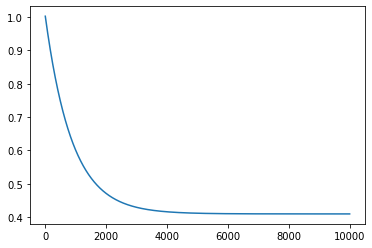

In [ ]:
model9 = Linear_Regression2(X_train, Y_train, learning_rate = 0.01, batch = 2)
List9 = model9.fit(X_train, Y_train, 10000)

predictions9 = model9.predict(X_test)
predictions9
plot9 = model9.plot()
plot9

### Mini Batch Gradient Descent with L_2 Regularization

In [ ]:
class Linear_Regression2():
    def __init__(self, x, y, learning_rate, batch):
        self.learning_rate = learning_rate
        self.batch = batch
        self.x = x
        self.y = y
        # self.number_ite = number_ite
        # self.w = 0
        # self.b = 0
    
    def _get_batch(self, x, y, batch_size):
        for i in range(0, len(x), self.batch):
          x = self.x[i:i+self.batch]
          y = self.y[i:i+self.batch]
        return x, y
    
    def fit(self, x, y, batch_size = 3, epochs = 10000):
        x = (x-x.mean())/x.std()
        N = len(x)
        List = []
        self.w = np.zeros((x.shape[1], 1))
        # print(self.w)
        # print(self.w.shape)
        self.b = 0
        # print(x.shape, y.shape)

        for j in range(-10,10):
          self.alpha = j
        # print(x.shape, y.shape)
        
        for e in range(epochs):
            # indexes = np.random.randint(N, size=batch_size)
            X_batch, y_batch = self._get_batch(x, y, batch_size)
            
            f = (np.dot(X_batch , self.w) + self.b +  self.alpha * self.w.T.dot(self.w)) - y_batch.reshape((-1, 1))

            # f = y_batch - (self.w * X_batch + self.b)
    
            self.w -= self.learning_rate * (2/N) * (X_batch.T.dot(f).sum() + self.alpha * self.w.sum())
            # print(self.w)
            self.b -= self.learning_rate * (2/N) * (f.sum())
                                
            loss1 = np.sum(np.power((f) ,2))/len(y_batch)
            
        
            # loss = mean_squared_error(y_batch, (self.w * X_batch + self.b))
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss1})")
            
            List.append(loss1)
                                      
        return List
                
    def predict(self, x):
        x = (x-x.mean())/x.std()
        return np.dot(x, self.w) + self.b

    def plot(self):
      plt.plot(List)

Epoch: 0, Loss: 1.464703738927709)
Epoch: 100, Loss: 1.4608293298015997)
Epoch: 200, Loss: 1.4569849777033448)
Epoch: 300, Loss: 1.4531707023924598)
Epoch: 400, Loss: 1.4493865303984927)
Epoch: 500, Loss: 1.4456324939478906)
Epoch: 600, Loss: 1.4419086299564787)
Epoch: 700, Loss: 1.4382149790847438)
Epoch: 800, Loss: 1.4345515848531987)
Epoch: 900, Loss: 1.4309184928151972)
Epoch: 1000, Loss: 1.4273157497846638)
Epoch: 1100, Loss: 1.423743403116284)
Epoch: 1200, Loss: 1.4202015000357846)
Epoch: 1300, Loss: 1.4166900870180203)
Epoch: 1400, Loss: 1.4132092092106585)
Epoch: 1500, Loss: 1.4097589099013343)
Epoch: 1600, Loss: 1.4063392300262274)
Epoch: 1700, Loss: 1.4029502077180758)
Epoch: 1800, Loss: 1.3995918778917273)
Epoch: 1900, Loss: 1.3962642718653888)
Epoch: 2000, Loss: 1.3929674170158028)
Epoch: 2100, Loss: 1.3897013364656567)
Epoch: 2200, Loss: 1.3864660488015756)
Epoch: 2300, Loss: 1.3832615678211337)
Epoch: 2400, Loss: 1.3800879023073604)
Epoch: 2500, Loss: 1.376945055829289)
E

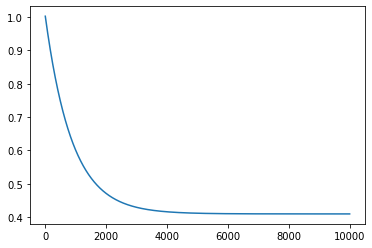

In [ ]:
model10 = Linear_Regression2(X_train, Y_train, learning_rate = 0.01, batch = 2)
List10 = model10.fit(X_train, Y_train, 10000)

predictions10 = model10.predict(X_test)
predictions10
plot10 = model10.plot()
plot10

### Mini Batch Gradient Descent with L_1 and L_2 Regularization

In [ ]:
class Linear_Regression2():
    def __init__(self, x, y, learning_rate, batch, l1_ratio):
        self.learning_rate = learning_rate
        self.batch = batch
        self.l1_ratio = l1_ratio
        self.x = x
        self.y = y
        # self.number_ite = number_ite
        # self.w = 0
        # self.b = 0
    
    def _get_batch(self, x, y, batch_size):
        for i in range(0, len(x), self.batch):
          x = self.x[i:i+self.batch]
          y = self.y[i:i+self.batch]
        return x, y
    
    def fit(self, x, y, batch_size = 3, epochs = 10000):
        x = (x-x.mean())/x.std()
        N = len(x)
        List = []
        self.w = np.zeros((x.shape[1], 1))
        # print(self.w)
        # print(self.w.shape)
        self.b = 0
        # print(x.shape, y.shape)

        for j in range(-10,10):
          self.alpha = j
        # print(x.shape, y.shape)

        
        for e in range(epochs):
            # indexes = np.random.randint(N, size=batch_size)
            X_batch, y_batch = self._get_batch(x, y, batch_size)
            self.l1_contr = self.l1_ratio * np.linalg.norm(self.w)
            self.l2_contr = (1 - self.l1_ratio) * 0.5 * self.w.T.dot(self.w)
            
            f = (np.dot(X_batch , self.w) + self.b + self.alpha * (self.l1_contr + self.l2_contr)) - y_batch.reshape((-1, 1))

            self.l1_contr = self.l1_ratio * np.sign(self.w)
            self.l2_contr = (1 - self.l1_ratio) * self.w

            # f = y_batch - (self.w * X_batch + self.b)
    
            self.w -= self.learning_rate * (2/N) * (X_batch.T.dot(f).sum() + self.alpha * (self.l1_contr + self.l2_contr).sum())
            self.b -= self.learning_rate * (2/N) * (f.sum())
                                
            loss1 = np.sum(np.power((f) ,2))/len(y_batch)
            
        
            # loss = mean_squared_error(y_batch, (self.w * X_batch + self.b))
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss1})")
            
            List.append(loss1)
                                      
        return List
                
    def predict(self, x):
        x = (x-x.mean())/x.std()
        return np.dot(x, self.w) + self.b

    def plot(self):
      plt.plot(List)

Epoch: 0, Loss: 1.464703738927709)
Epoch: 100, Loss: 1.4647400069555236)
Epoch: 200, Loss: 1.4646730228627676)
Epoch: 300, Loss: 1.4645690068531827)
Epoch: 400, Loss: 1.4644651128048796)
Epoch: 500, Loss: 1.4646963632582652)
Epoch: 600, Loss: 1.4646120534536873)
Epoch: 700, Loss: 1.4645082524951336)
Epoch: 800, Loss: 1.4647111806086826)
Epoch: 900, Loss: 1.4646531282011122)
Epoch: 1000, Loss: 1.4645519940806015)
Epoch: 1100, Loss: 1.4644485380467933)
Epoch: 1200, Loss: 1.4646683892858445)
Epoch: 1300, Loss: 1.4645960761955483)
Epoch: 1400, Loss: 1.4644927065097484)
Epoch: 1500, Loss: 1.4643895133983094)
Epoch: 1600, Loss: 1.4646259906947834)
Epoch: 1700, Loss: 1.4645374782483234)
Epoch: 1800, Loss: 1.4644344442714154)
Epoch: 1900, Loss: 1.4646419425706783)
Epoch: 2000, Loss: 1.464582553661673)
Epoch: 2100, Loss: 1.4644796382914944)
Epoch: 2200, Loss: 1.4643769352954383)
Epoch: 2300, Loss: 1.464600405663575)
Epoch: 2400, Loss: 1.4645254555370677)
Epoch: 2500, Loss: 1.464422827695623)
Ep

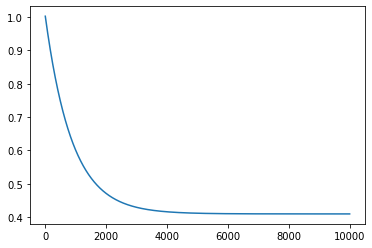

In [ ]:
model11 = Linear_Regression2(X_train, Y_train, learning_rate = 0.01, batch = 2, l1_ratio=0.5)
List11 = model11.fit(X_train, Y_train, 10000)

predictions11 = model11.predict(X_test)
predictions11
plot11 = model11.plot()
plot11 

Epoch: 0, Loss: 1.464703738927709)
Epoch: 100, Loss: 1.4608199018689483)
Epoch: 200, Loss: 1.4569469618166009)
Epoch: 300, Loss: 1.4530848875914655)
Epoch: 400, Loss: 1.449233648104129)
Epoch: 500, Loss: 1.4453932123547113)
Epoch: 600, Loss: 1.4415635494326031)
Epoch: 700, Loss: 1.4377446285162117)
Epoch: 800, Loss: 1.4339364188727006)
Epoch: 900, Loss: 1.4301388898577372)
Epoch: 1000, Loss: 1.4263520109152337)
Epoch: 1100, Loss: 1.4225757515770954)
Epoch: 1200, Loss: 1.4188100814629647)
Epoch: 1300, Loss: 1.4150549702799693)
Epoch: 1400, Loss: 1.4113103878224686)
Epoch: 1500, Loss: 1.4075763039718034)
Epoch: 1600, Loss: 1.4038526886960436)
Epoch: 1700, Loss: 1.4001395120497384)
Epoch: 1800, Loss: 1.3964367441736654)
Epoch: 1900, Loss: 1.3927443552945857)
Epoch: 2000, Loss: 1.389062315724991)
Epoch: 2100, Loss: 1.3853905958628596)
Epoch: 2200, Loss: 1.3817291661914073)
Epoch: 2300, Loss: 1.3780779972788437)
Epoch: 2400, Loss: 1.374437059778125)
Epoch: 2500, Loss: 1.3708063244267108)
Ep

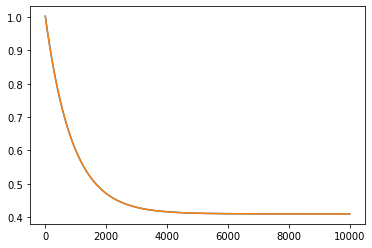